# Problem Statement

### This project understand how the student's performence is affected by other veriables

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import CSV dataset file 

In [9]:
df = pd.read_csv('data/raw.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [10]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no missing in dataset 

In [13]:
df.duplicated().sum()

0

### There are no duplicate vaue in dataset

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- All means are very close to each other 
- All standerd deviations also very close to each other

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
print("Gender:",df['gender'].unique())

print("race_ethnicity:",df['race/ethnicity'].unique())

print("parental_level_of_education:",df['parental level of education'].unique())

print("lunch:",df['lunch'].unique())

print("test_preparation_course:",df['test preparation course'].unique())

Gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


## we can add 2 colums in dataset which is total marks and average

In [17]:
df["total_score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average"]= df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Let's see some plots

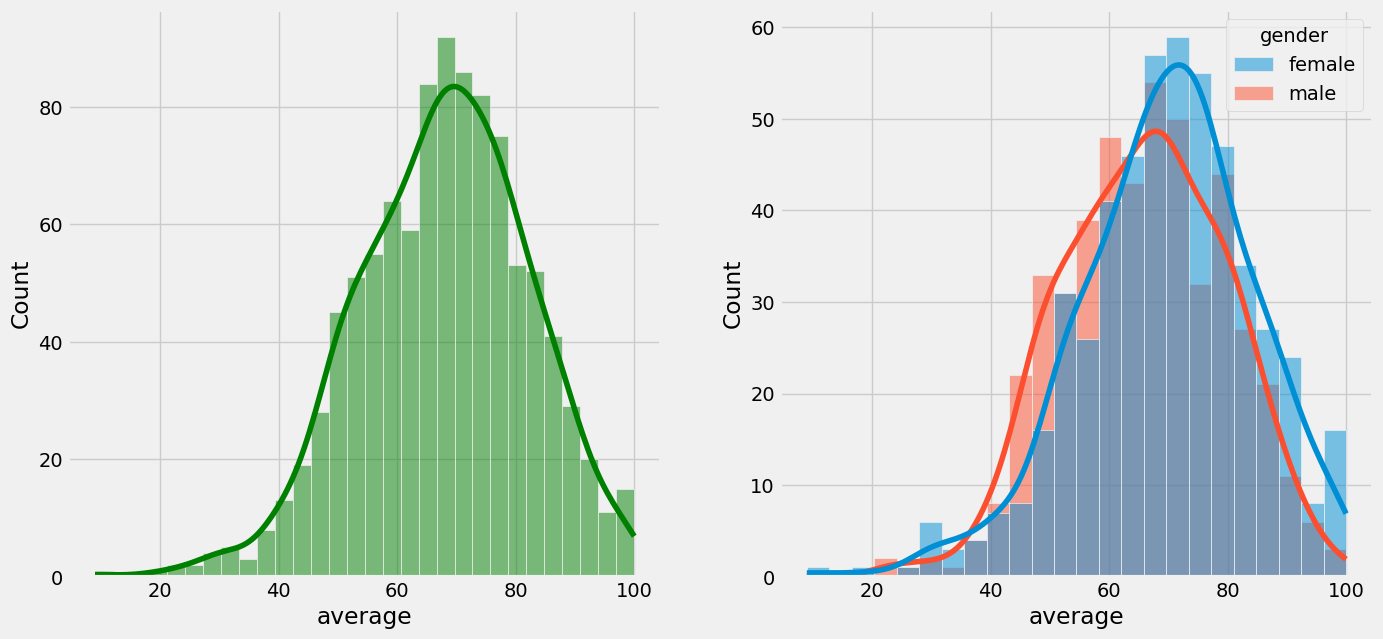

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

- Female students performence better than male students

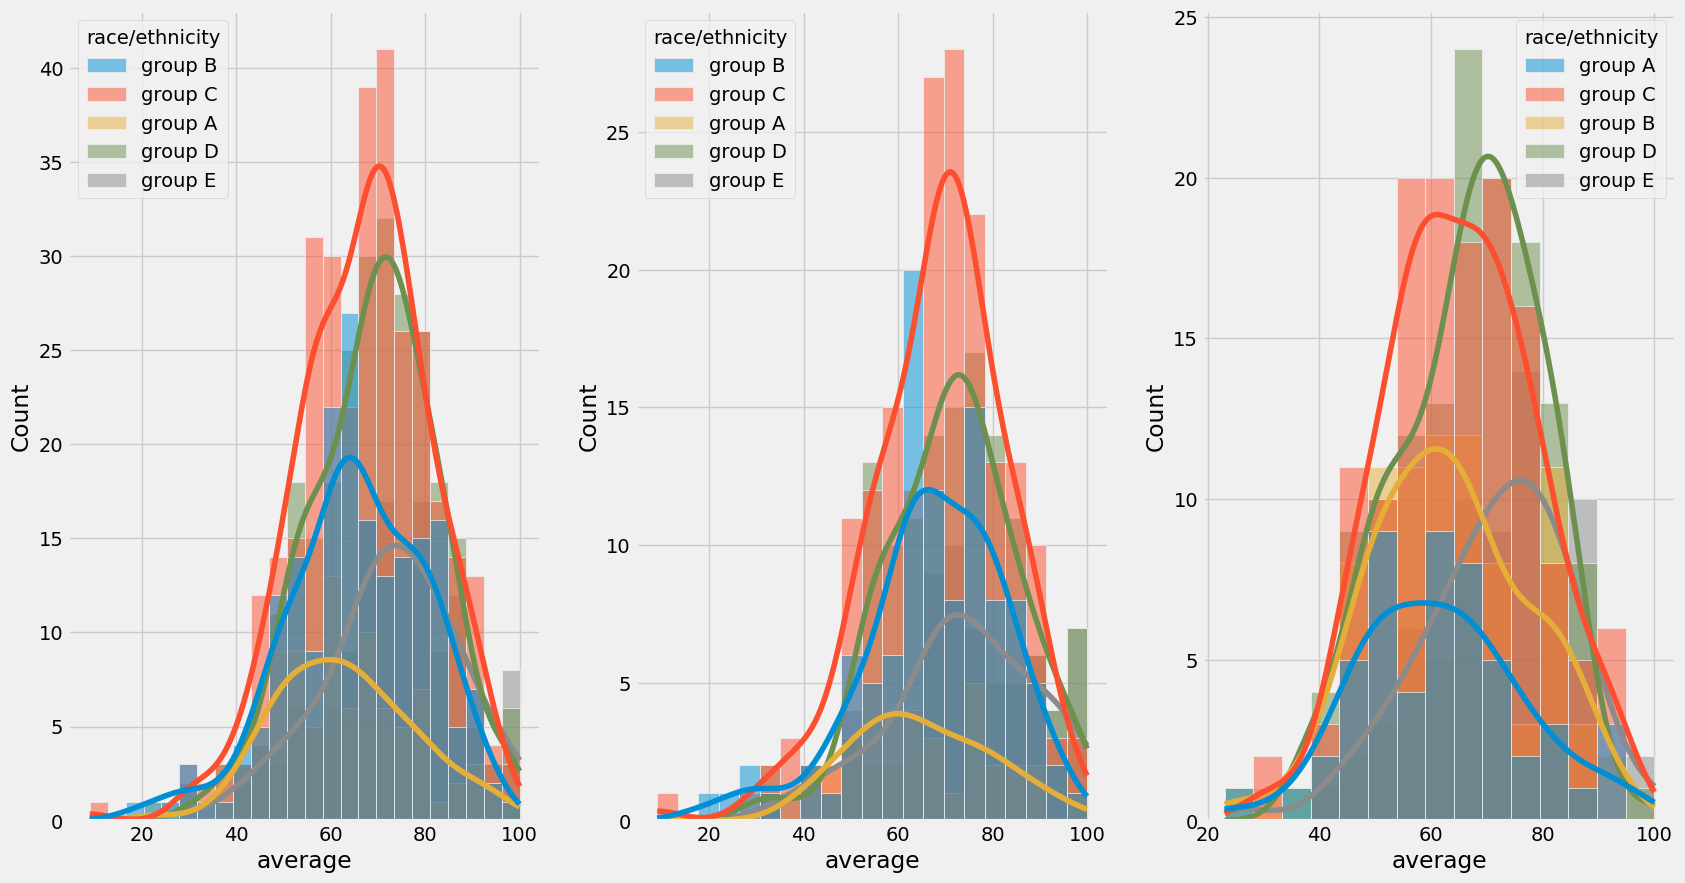

In [19]:


plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()



- students group A and E performence is very poor whether the are female or male 

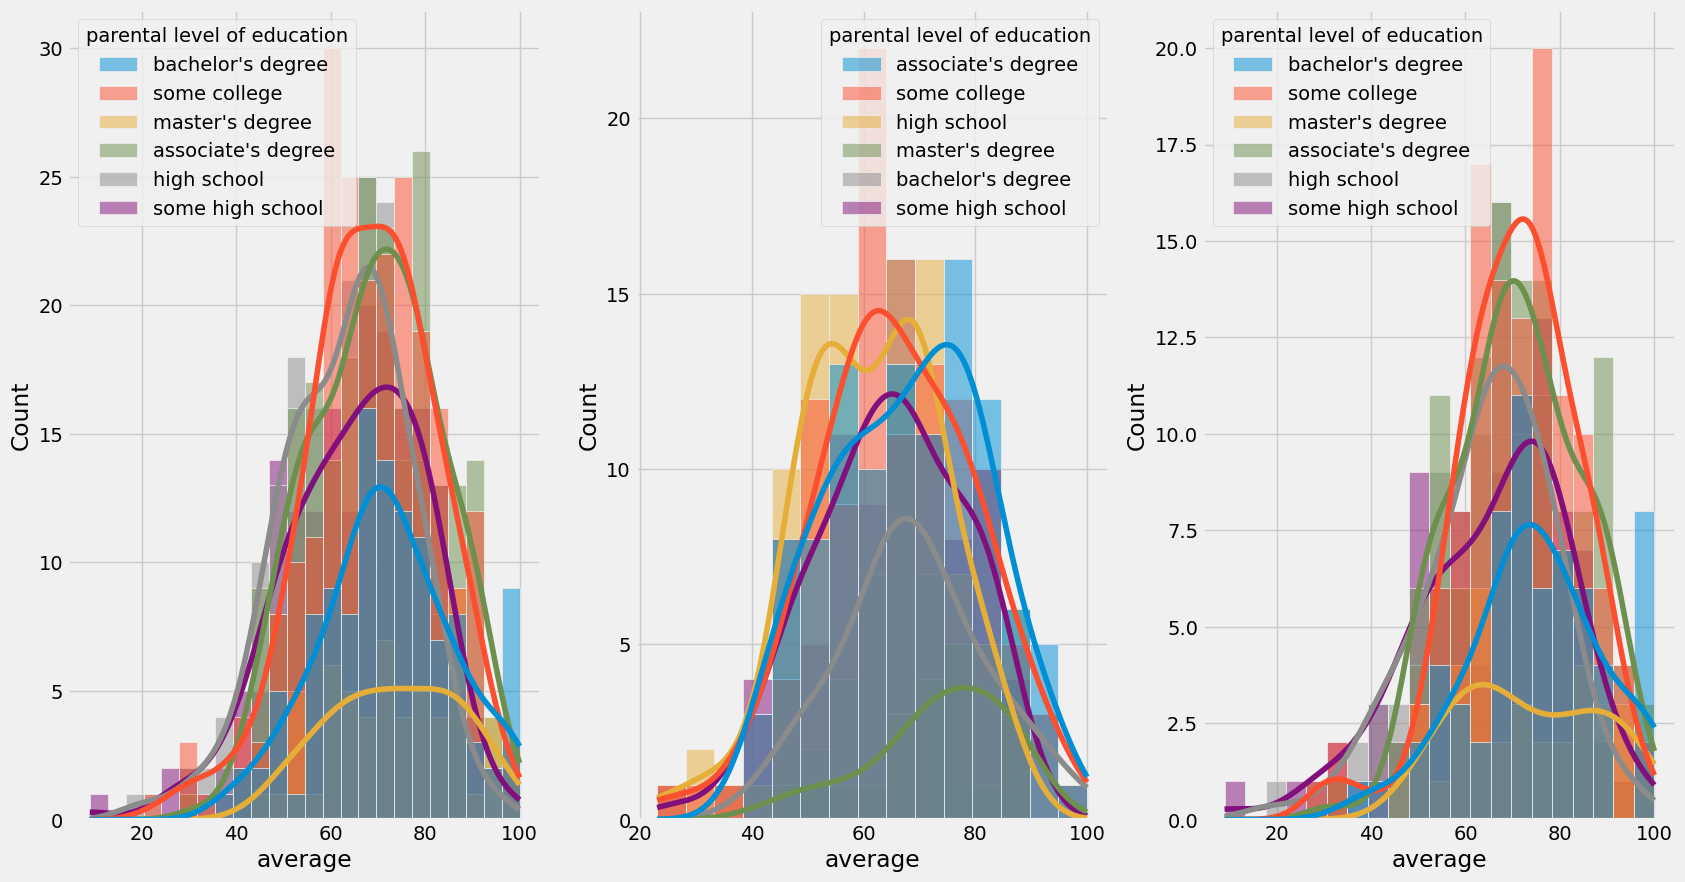

In [20]:

plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male's performance is well
- 3rd plot we can see there is no effect of parent's education on female students.

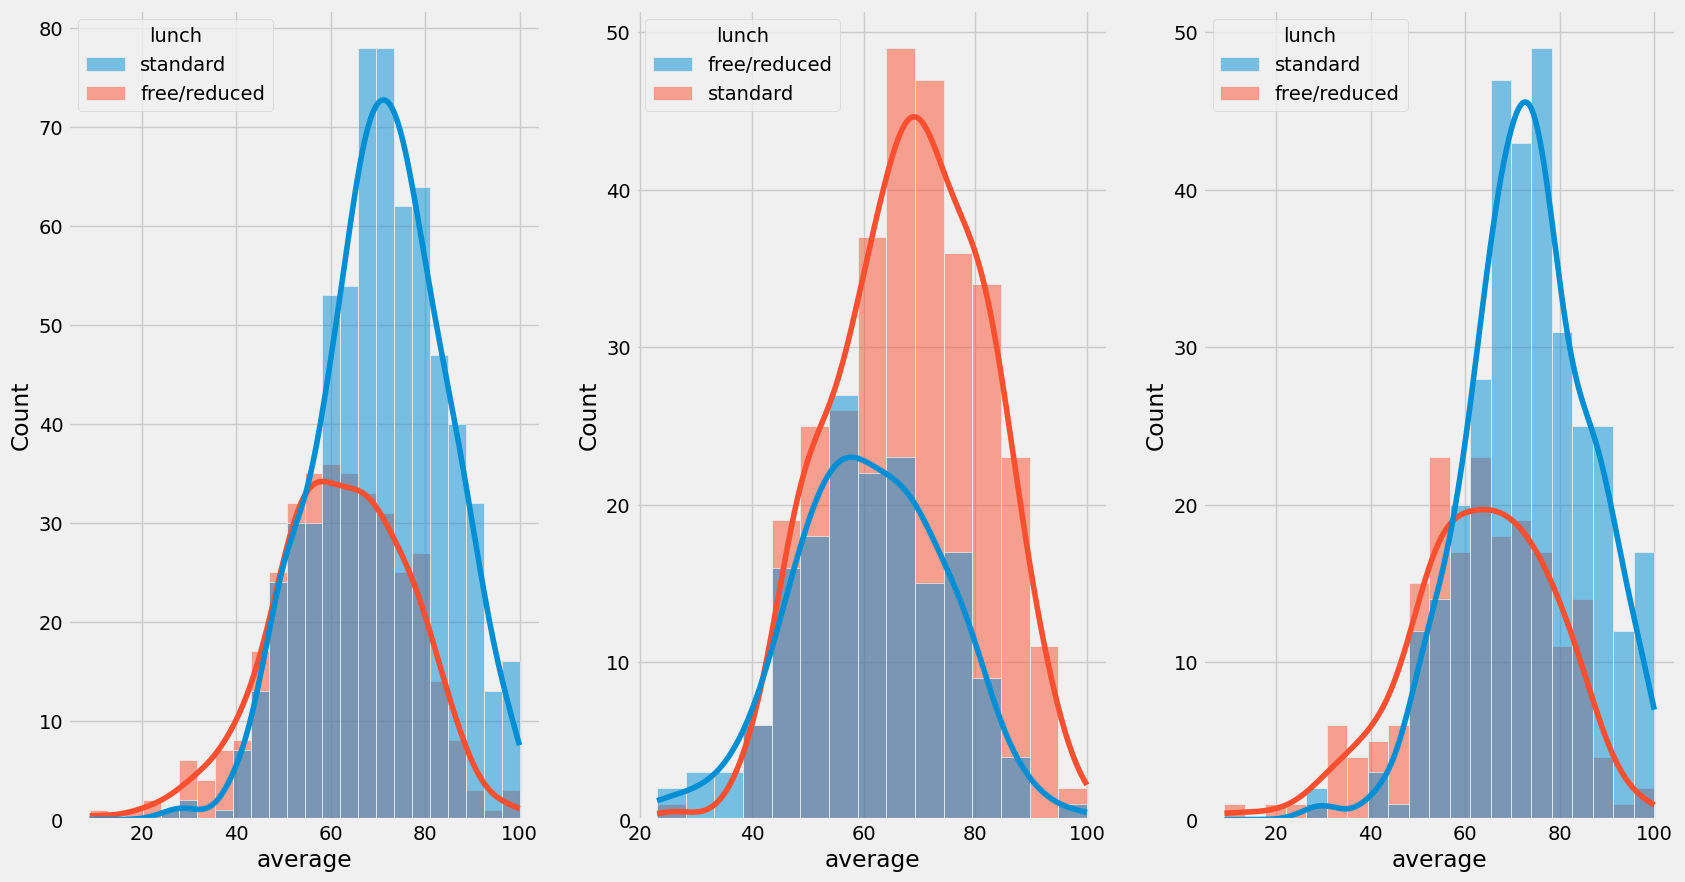

In [21]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

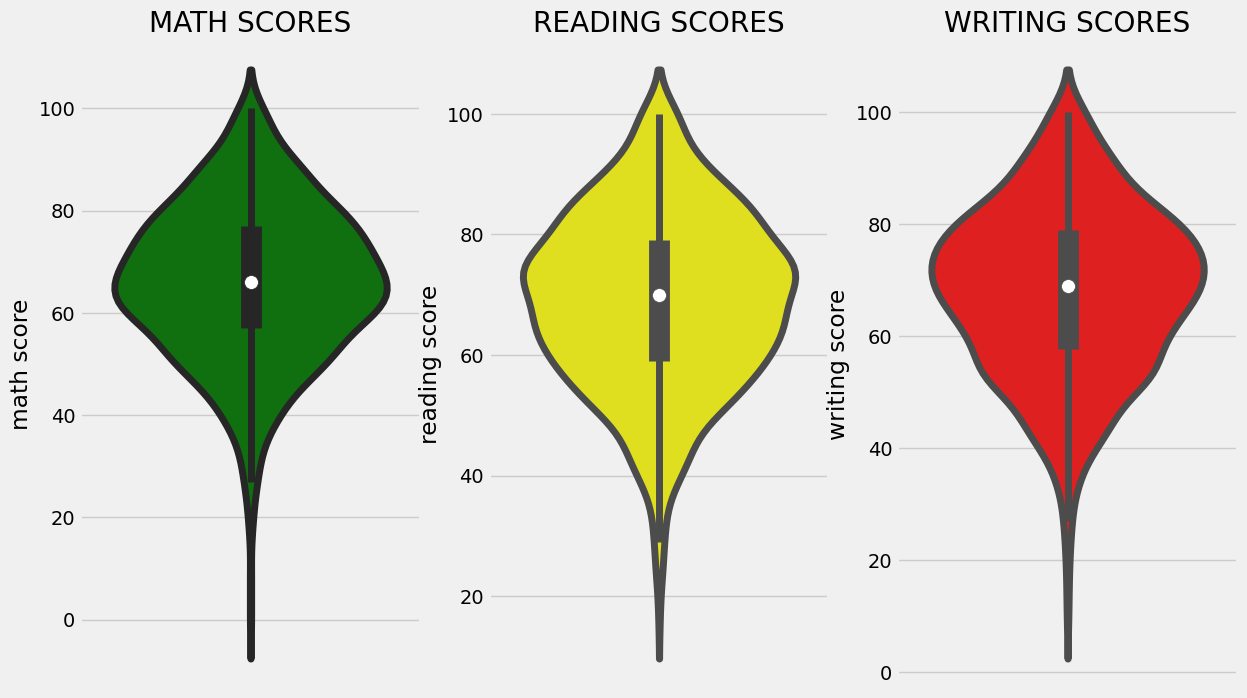

In [22]:


plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='green',linewidth=5)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='yellow',linewidth=5)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='red',linewidth=5)
plt.show()



- its clearly visible that most of the students score in between 60-80

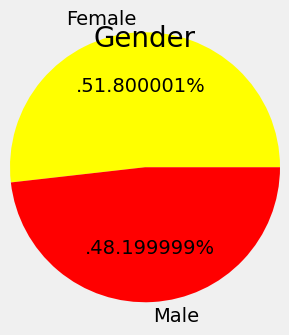

In [38]:
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['yellow','red']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%',radius=1.5)
plt.title('Gender', fontsize = 20)
plt.show()

- Male and Female almost same

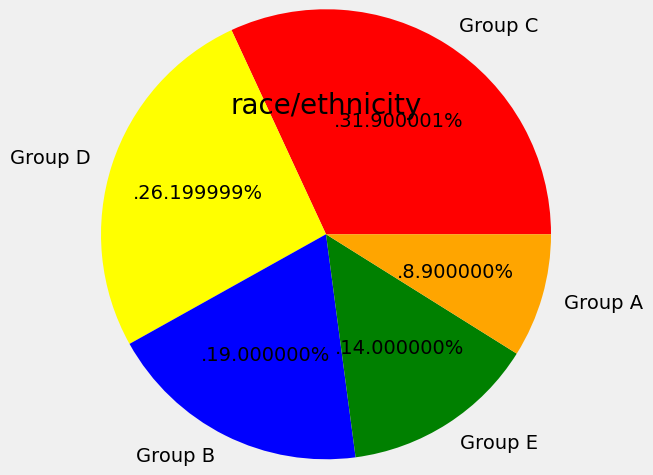

In [41]:
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'yellow', 'blue', 'green','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',radius=2.5)
plt.title('race/ethnicity', fontsize = 20)
plt.show()

- Group C has most number of students

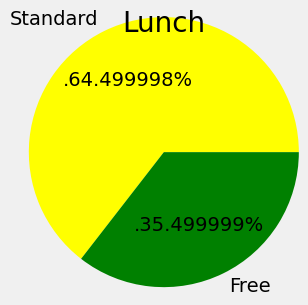

In [40]:
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['yellow','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',radius=1.5)
plt.title('Lunch', fontsize = 20)
plt.show()

- almost 65% student prefer standerd lunch

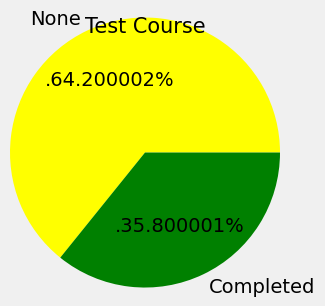

In [42]:
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['yellow','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',radius=1.5)
plt.title('Test Course', fontsize = 15)
plt.show()

- 64% student not completed test preparation course

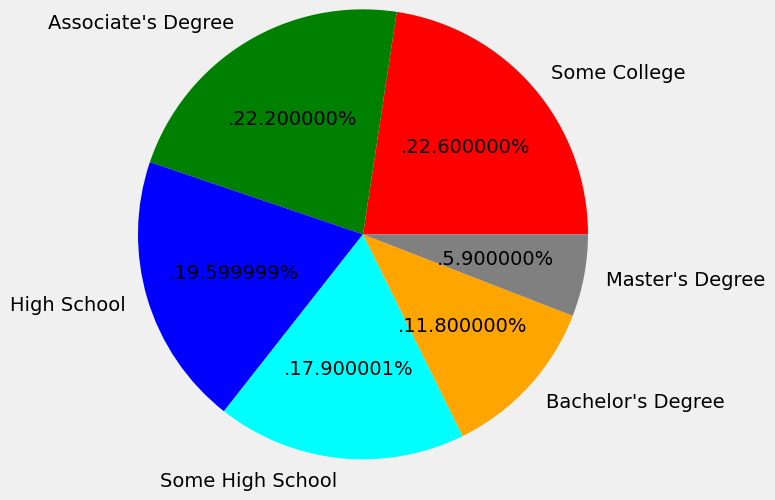

In [43]:
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',radius=2.5)
plt.show()

- Number of students whose parental education is "Some College" and "Associate's Degree" is greater 

In [28]:

gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


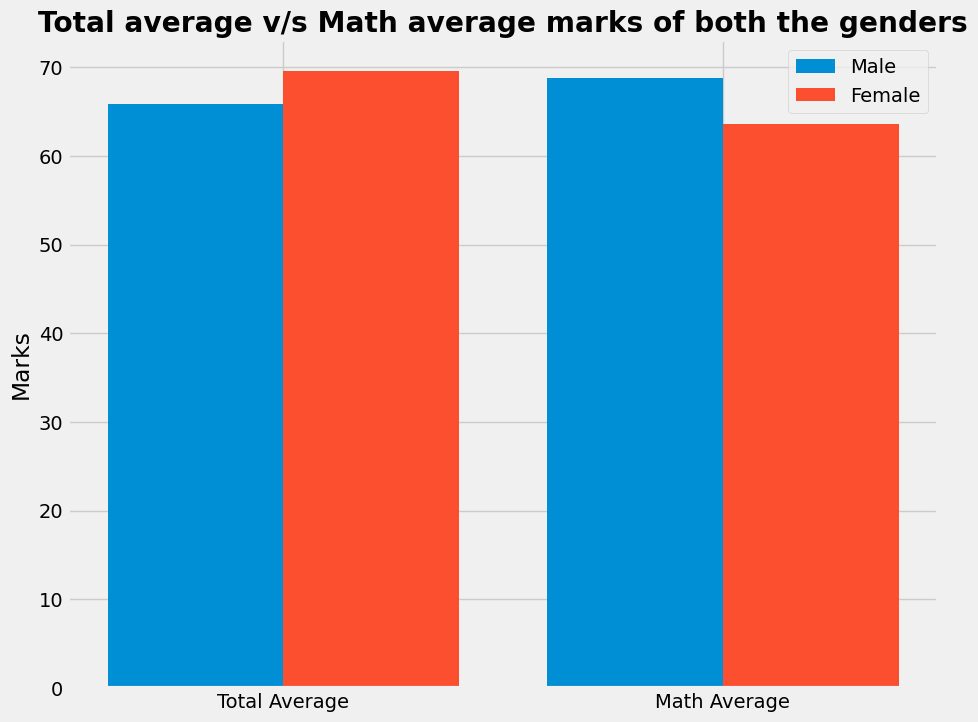

In [29]:


plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()




   - On an average females have a better overall score than men.
   - whereas males have scored higher in Maths.


- largest number of parents are from some college

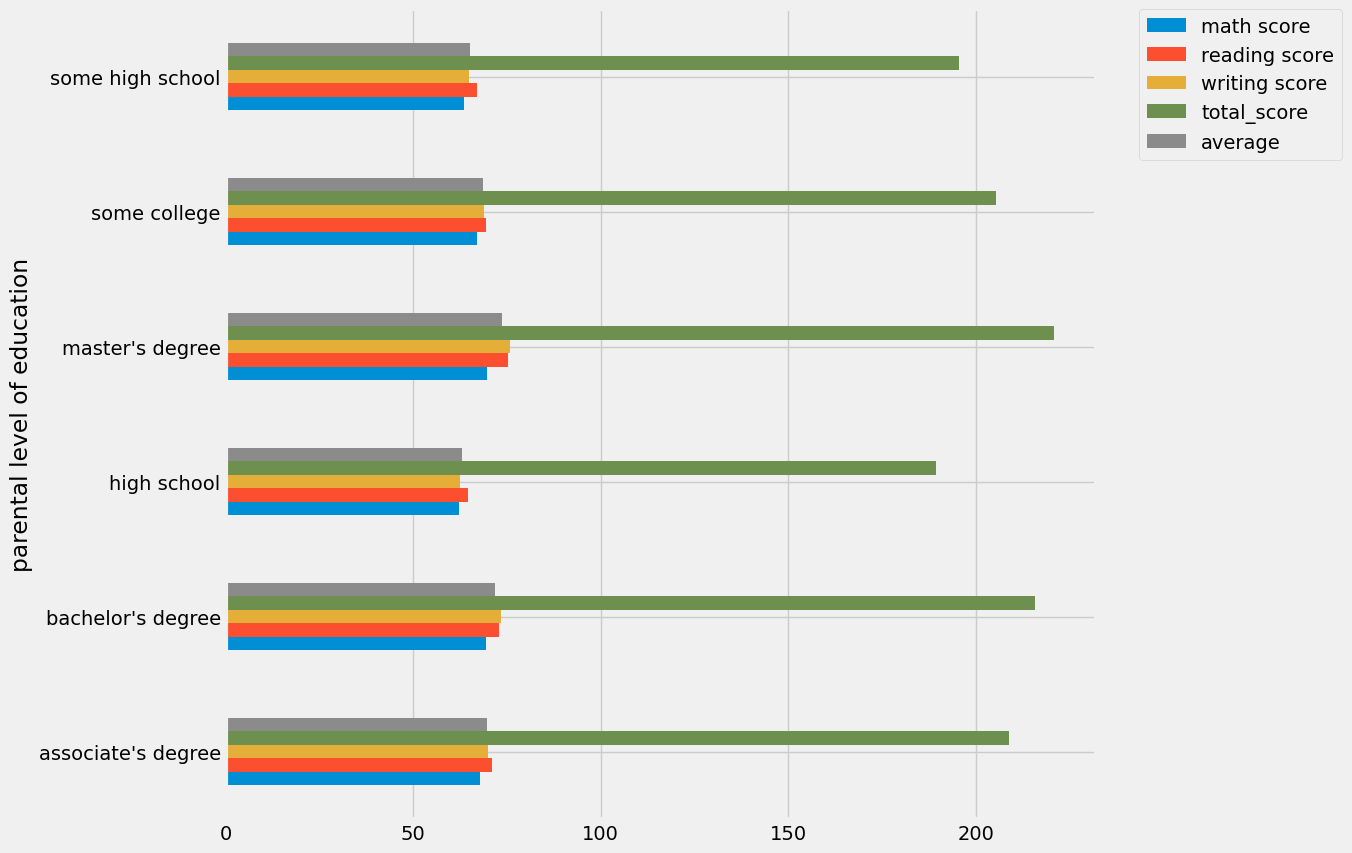

In [44]:


df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



- The score of student whose parents possess master and bachelor level education are higher than others.

- Outliers

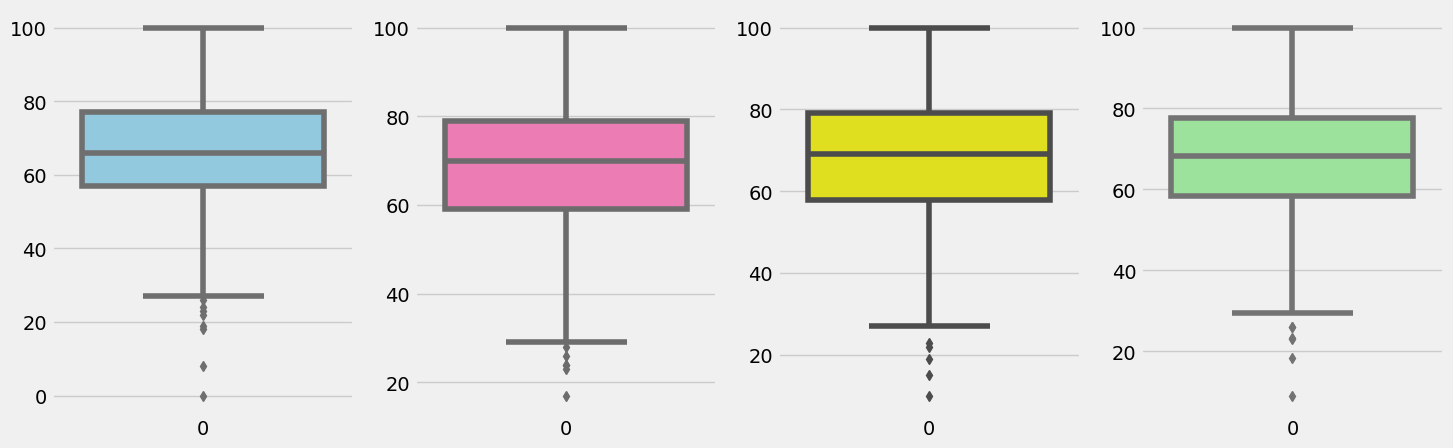

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

- Outliers 

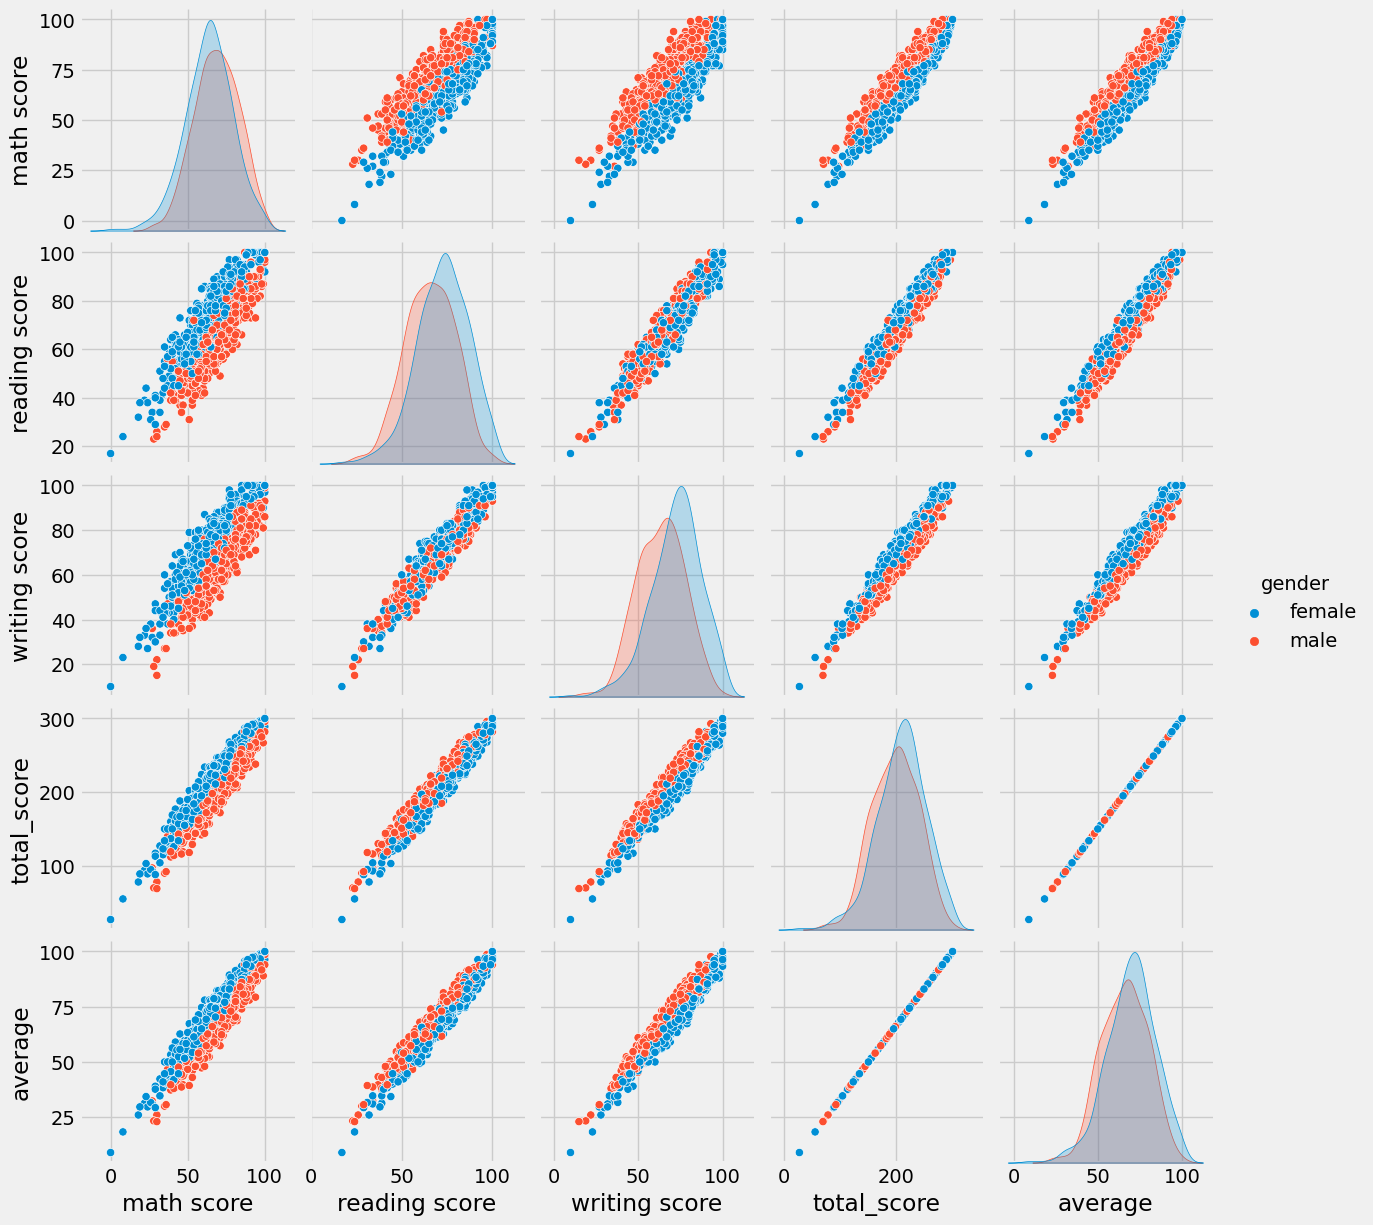

In [32]:
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other.